In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and preprocess the data

In [ ]:
data = pd.read_csv("/Users/julialorenc/Desktop/BAN443_LLMs/FINAL_PROJECT/FINAL_Beige_Book_sentiment_scores.csv")
data.head()

,Unnamed: 0,year,month,Atlanta,Boston,Chicago,Cleveland,Dallas,Kansas City,Minneapolis,New York,Philadelphia,Richmond,San Francisco,St Louis
0,0,1997,1,0.120567,0.131673,0.245192,0.267081,0.071429,-0.010989,0.120879,0.240838,-0.180556,0.518519,0.107143,-0.233945
1,1,1997,3,0.205128,0.215328,0.230769,0.247863,0.301676,-0.280899,-0.126154,-0.057971,-0.020833,0.315789,0.041379,0.196970
2,2,1997,5,0.142857,-0.036885,0.273128,0.309278,0.187817,-0.222727,-0.011236,0.496894,-0.137755,0.215223,0.182796,0.183908
3,3,1997,6,0.173077,-0.058632,0.257261,0.302703,0.365385,-0.323651,-0.201238,0.000000,0.180000,0.204620,0.215686,0.139738
4,4,1997,8,0.114583,0.064885,0.205645,0.324324,0.009615,-0.154589,-0.016667,0.149068,-0.036585,0.269663,0.316770,0.055118


In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data.head()

,year,month,Atlanta,Boston,Chicago,Cleveland,Dallas,Kansas City,Minneapolis,New York,Philadelphia,Richmond,San Francisco,St Louis
0,1997,1,0.120567,0.131673,0.245192,0.267081,0.071429,-0.010989,0.120879,0.240838,-0.180556,0.518519,0.107143,-0.233945
1,1997,3,0.205128,0.215328,0.230769,0.247863,0.301676,-0.280899,-0.126154,-0.057971,-0.020833,0.315789,0.041379,0.196970
2,1997,5,0.142857,-0.036885,0.273128,0.309278,0.187817,-0.222727,-0.011236,0.496894,-0.137755,0.215223,0.182796,0.183908
3,1997,6,0.173077,-0.058632,0.257261,0.302703,0.365385,-0.323651,-0.201238,0.000000,0.180000,0.204620,0.215686,0.139738
4,1997,8,0.114583,0.064885,0.205645,0.324324,0.009615,-0.154589,-0.016667,0.149068,-0.036585,0.269663,0.316770,0.055118


In [ ]:
data[data["year"] == 2020]

,year,month,Atlanta,Boston,Chicago,Cleveland,Dallas,Kansas City,Minneapolis,New York,Philadelphia,Richmond,San Francisco,St Louis
184,2020,1,0.155172,0.200000,-0.047619,0.046875,0.145161,0.301587,0.000000,0.222222,0.260870,0.136986,0.273973,0.013514
185,2020,3,0.169492,0.118644,-0.015152,0.138889,0.442623,0.281250,-0.090909,0.353846,0.119403,0.094595,0.140845,0.040000
186,2020,4,0.422535,0.290323,0.368421,0.614035,0.553846,0.724638,0.442623,0.483871,0.068493,0.421687,0.320000,0.294118
187,2020,5,0.555556,0.101449,0.561644,0.371429,0.554054,0.636364,0.383562,0.451613,0.253731,0.581081,0.313253,0.362319
188,2020,7,0.376812,0.180556,0.075000,0.245902,0.315068,0.420290,0.301370,0.218750,0.093750,0.310811,0.243243,0.085714
189,2020,9,0.441176,0.161765,0.150685,0.281690,0.347826,0.352941,0.125000,0.383333,0.231884,0.289474,0.294118,0.197368
190,2020,10,0.246377,0.000000,0.216216,0.316667,0.313433,0.265625,0.071429,0.313433,0.174603,0.308642,0.088608,0.136986
191,2020,12,0.228571,0.045455,-0.028169,0.205479,0.424242,0.142857,0.191176,0.354839,0.400000,0.205128,0.095890,0.200000


### Labeling the recessions
* 03.2001 - 11.2001
* 01.2008 - 06.2009
* 03.2020 - 04.2020

In [ ]:
data["recession"] = 0

data.loc[(data["year"] == 2001) & (data["month"] >= 3) & (data["month"] <= 11), "recession"] = 1
data.loc[(data["year"] == 2008) | ((data["year"] == 2009) & (data["month"] <= 6)), "recession"] = 1
data.loc[(data["year"] == 2020) & (data["month"].isin([3, 4])), "recession"] = 1

In [ ]:
data.head(10)

,year,month,Atlanta,Boston,Chicago,Cleveland,Dallas,Kansas City,Minneapolis,New York,Philadelphia,Richmond,San Francisco,St Louis,recession
0,1997,1,0.120567,0.131673,0.245192,0.267081,0.071429,-0.010989,0.120879,0.240838,-0.180556,0.518519,0.107143,-0.233945,0
1,1997,3,0.205128,0.215328,0.230769,0.247863,0.301676,-0.280899,-0.126154,-0.057971,-0.020833,0.315789,0.041379,0.196970,0
2,1997,5,0.142857,-0.036885,0.273128,0.309278,0.187817,-0.222727,-0.011236,0.496894,-0.137755,0.215223,0.182796,0.183908,0
3,1997,6,0.173077,-0.058632,0.257261,0.302703,0.365385,-0.323651,-0.201238,0.000000,0.180000,0.204620,0.215686,0.139738,0
4,1997,8,0.114583,0.064885,0.205645,0.324324,0.009615,-0.154589,-0.016667,0.149068,-0.036585,0.269663,0.316770,0.055118,0
5,1997,9,0.052402,-0.333333,0.196850,0.016194,0.090535,-0.126126,-0.316498,0.093525,-0.328671,0.011765,0.271523,0.280612,0
6,1997,10,0.078049,-0.143382,0.348416,-0.171548,-0.010601,-0.098446,-0.346354,0.119760,0.243056,0.281046,0.205556,0.071795,0
7,1997,12,0.139896,-0.058140,-0.004785,0.274194,0.351240,-0.234973,0.225806,0.136364,-0.028571,0.073171,0.452381,0.156398,0
8,1998,1,0.138889,0.022727,0.397321,0.170940,0.304348,0.090090,0.215686,0.523560,0.227848,-0.035948,0.333333,0.040936,0
9,1998,3,0.116402,0.051587,0.287500,0.181818,0.552083,-0.036697,0.108168,0.308756,0.082418,0.475336,0.543353,0.262857,0


### Drop `year` and `month` columns - redundant for model training

In [ ]:
data.drop(columns=['year', 'month'], inplace=True)
data.head()

,Atlanta,Boston,Chicago,Cleveland,Dallas,Kansas City,Minneapolis,New York,Philadelphia,Richmond,San Francisco,St Louis,recession
0,0.120567,0.131673,0.245192,0.267081,0.071429,-0.010989,0.120879,0.240838,-0.180556,0.518519,0.107143,-0.233945,0
1,0.205128,0.215328,0.230769,0.247863,0.301676,-0.280899,-0.126154,-0.057971,-0.020833,0.315789,0.041379,0.196970,0
2,0.142857,-0.036885,0.273128,0.309278,0.187817,-0.222727,-0.011236,0.496894,-0.137755,0.215223,0.182796,0.183908,0
3,0.173077,-0.058632,0.257261,0.302703,0.365385,-0.323651,-0.201238,0.000000,0.180000,0.204620,0.215686,0.139738,0
4,0.114583,0.064885,0.205645,0.324324,0.009615,-0.154589,-0.016667,0.149068,-0.036585,0.269663,0.316770,0.055118,0


# XGBoost model

In [ ]:
data_copy = data.copy()

### Stratified train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = data_copy.drop(columns=['recession'])
y = data_copy['recession']

imputer = SimpleImputer(strategy='mean') # Impute any missing values with the mean
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### SMOTE sampling to balance the classes

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", pd.Series(y_train_smote).value_counts())

Class distribution before SMOTE: recession
0    161
1     17
Name: count, dtype: int64
Class distribution after SMOTE: recession
1    161
0    161
Name: count, dtype: int64


### Train the model

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)

model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Get a classification report

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.50      0.67         4

    accuracy                           0.96        45
   macro avg       0.98      0.75      0.82        45
weighted avg       0.96      0.96      0.95        45

ROC-AUC: 0.96


In [ ]:
# Precision: Out of all observations classified as recessions 100% of them were classified correctly
# Recall: Out of all actual recessions, 50% of them were captured by the model

### Check if not overfitted

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train_smote)
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# 0.04 percentage points difference between training and validation datasets - no overfitting

Training Accuracy: 1.00


## SHAP for model interpretation

In [ ]:
import shap

explainer = shap.Explainer(model, X_train_smote)
shap_values = explainer(X_test)

In [ ]:
feature_names = ["Atlanta", "Boston", "Chicago", "Cleveland", "Dallas", "Kansas City", "Minneapolis", "New York", "Philadelphia", "Richmond", "San Francisco", "St Louis"]
X_test_shap = pd.DataFrame(X_test, columns=feature_names)

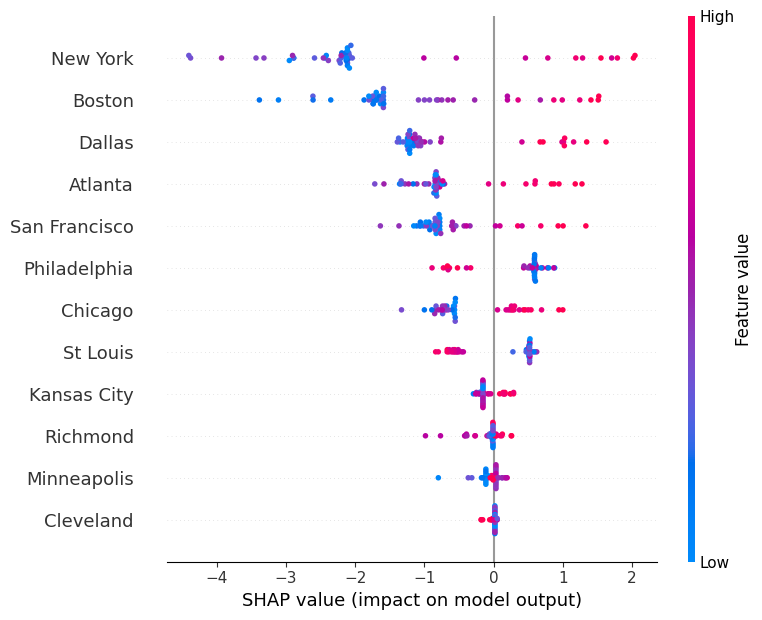

In [ ]:
shap.summary_plot(shap_values, X_test_shap)

## Evaluate on December 2024 beigebook
Should be marked as class 0

In [ ]:
test_data = pd.read_csv("DECEMBER_FINETUNED_Beige_Book_sentiment_scores.csv")
test_data.head()

,Unnamed: 0,year,month,Atlanta,Boston,Chicago,Cleveland,Dallas,Kansas City,Minneapolis,New York,Philadelphia,Richmond,San Francisco,St Louis
0,0,2024,12,0.059395,-0.068744,0.172076,0.207816,0.10994,0.163787,0.068427,0.220844,0.140239,-0.226022,0.12256,-0.079859


In [ ]:
test_data.drop(columns=["Unnamed: 0", "year", "month"], inplace = True)

In [ ]:
pred_dec = model.predict(test_data)
print(pred_dec)

[0]
